# Assignment 1: Test the Z test:

Generate N samples from a distribution of your choice, but not a Gaussian with a chosen mean μ and standard deviation σ: N(μ, σ) and calculate the mean of each sample (all samples should have the same size n).

Assess the validity of the Z-test: If the samples are drawn from the distribution you are testing the z-values you calculate should follow a N(0,1) distribution (a Gaussian with mean 0 and standard deviation 1). Show that the distribution of z -statistics (find the formula in a statistics book or in last week’s slides) that you calculated (one for each sample) is indeed consistent with N(0,1).

In [1]:
import numpy as np
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import stats   
import matplotlib.mlab as mlab


%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Plot your original distribution

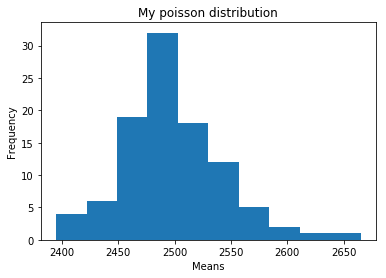

In [2]:
# a seed for reproducability
np.random.seed(14)

# let's create a sample to work with so we can prove. 
# make decisions about what our population will be

mymean = 2500
# for poission this is dependent upon the mean
mystd = 50
Nsamples = 1000

#let's take 100 random samples from our population
# sp.stats.norm.rvs(loc=mymean, scale=mystdev, size=100)
# rvs is the way to draw a sample from a normal distribution

x = sp.stats.poisson.rvs(mymean, size=(100))

# let's see what it looks like
pl.hist(sp.stats.poisson.rvs(mymean, size=100));
plt.title('My poisson distribution')
plt.xlabel('Means')
plt.ylabel('Frequency')


# Plot at least one of the samples

In [3]:
# loop through to grab 1000 z scores (from 1000 samples to compare)
nit = 1000
myDmeans = np.zeros(nit)

for i in range(nit):
# create dist
    mydist = (sp.stats.poisson.rvs(mymean, size=Nsamples))
    myDmeans[i] = mydist.mean()

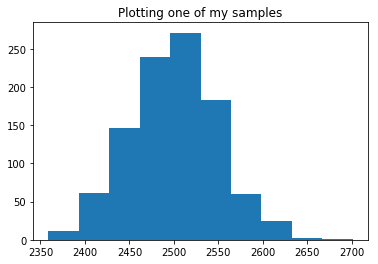

In [4]:
pl.hist(mydist)
pl.title("Plotting one of my samples")

# Plot the distribution of z statistics


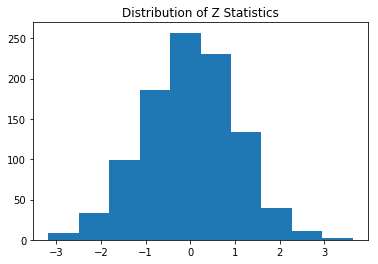

In [5]:
zs = (mymean - myDmeans) * np.sqrt(Nsamples) / mystd
plt.hist(zs)
plt.title("Distribution of Z Statistics")


The red and blue and red fit lines are a true normal distribution, and the poissson z scores. Very similar!! 


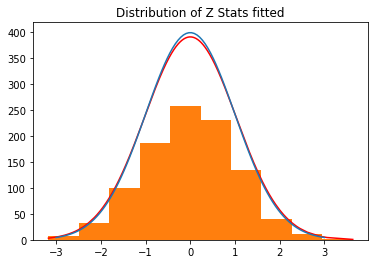

In [6]:
from scipy.stats import norm

sort_zs = sorted(zs)  
# the actual distribution
fit = (stats.norm.pdf(sort_zs, np.mean(sort_zs), np.std(sort_zs)) * 1e3) 
pl.plot(sort_zs, fit, '-r')

# a true normal fit line for comparison
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
pl.plot(x,mlab.normpdf(x, mu, sigma) * 1000)

plt.hist(zs)
pl.title('Distribution of Z Stats fitted')

print ("The red and blue and red fit lines are a true normal distribution, and the poissson z scores. Very similar!! ")

The red and blue and red fit lines are a true normal distribution, and the poissson z scores. Very similar!!

# KS test and what it means

In [7]:
stats.kstest(zs, 'norm')

KstestResult(statistic=0.026586296342845067, pvalue=0.47799790276867959)

**What this means**<br/>
The p value here is quite hight. The results of this test show that we cannot reject the null hypothesis that they're from the same parent distribution. 